# Data distribution

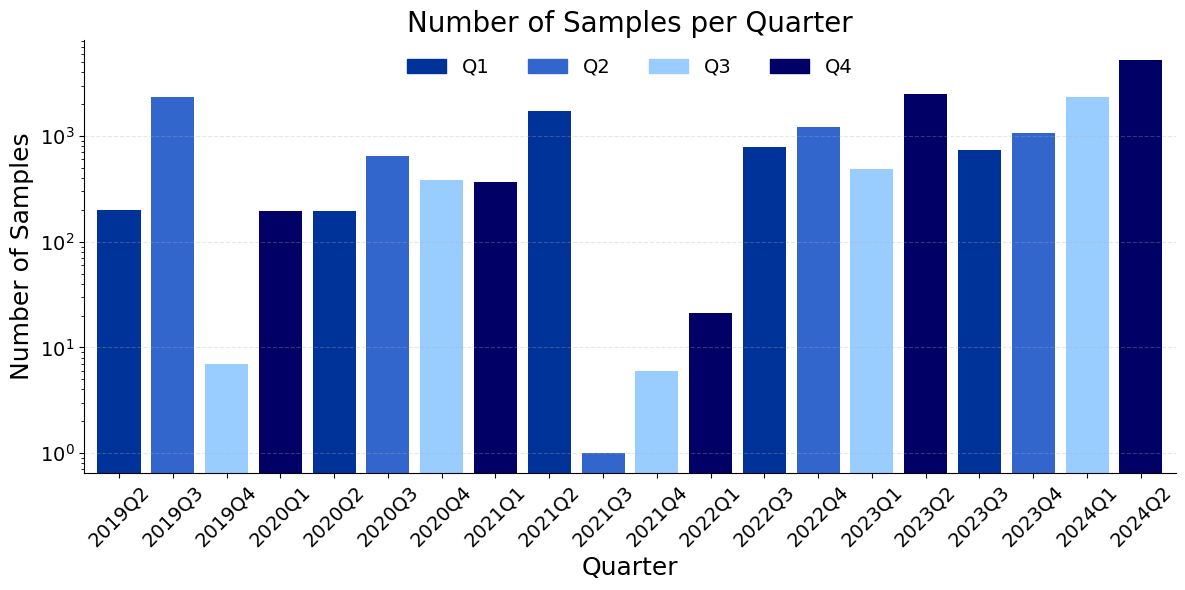

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib.ticker as ticker

file_path = '/content/drive/My Drive/deepfake/Deepfake_orignal.json'
with open(file_path, 'r') as file:
    data = json.load(file)

created_at = [datetime.strptime(item['createdAt'], '%Y-%m-%dT%H:%M:%S.%fZ') for item in data]
df = pd.DataFrame({'created_at': created_at})
df['year_quarter'] = df['created_at'].dt.to_period('Q')
quarterly_counts = df['year_quarter'].value_counts().sort_index()

colors = ['#003399', '#3366CC', '#99CCFF','#000066']
color_list = colors * (len(quarterly_counts) // len(colors) + 1)

plt.figure(figsize=(12, 6))
quarterly_counts.plot(kind='bar', logy=True, color=color_list[:len(quarterly_counts)], width=0.8)
plt.title('Number of Samples per Quarter', fontsize=20)
plt.xlabel('Quarter', fontsize=18)
plt.ylabel('Number of Samples', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', ls='--', alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'$10^{{{int(np.log10(y))}}}$'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

labels = ['Q1', 'Q2', 'Q3', 'Q4']
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(4)]
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, frameon=False, fontsize=14)

plt.tight_layout()
plt.savefig('samples_per_quarter.pdf', format='pdf')
plt.show()
